In [32]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts
import statsmodels.api as sm
import warnings


from statsmodels.tsa.stattools import acf
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import bartlett
from scipy.stats import levene
from sqlalchemy import create_engine
from sklearn import linear_model


In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


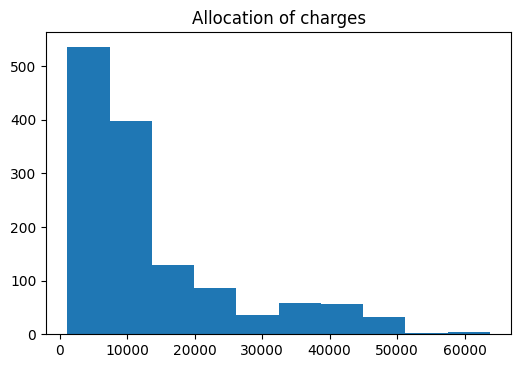

In [4]:
plt.figure(figsize =(6,4), dpi =100)
plt.hist(insurance.charges)
plt.title('Allocation of charges')
plt.show()

In [5]:
insurance['is_woman'] = insurance.sex.replace({'female':1, "male":0})
insurance['is_smoker'] = insurance.smoker.replace({'yes':1, "no":0})
insurance[['is_woman','is_smoker']].head()


,is_woman,is_smoker
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [6]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,is_woman,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


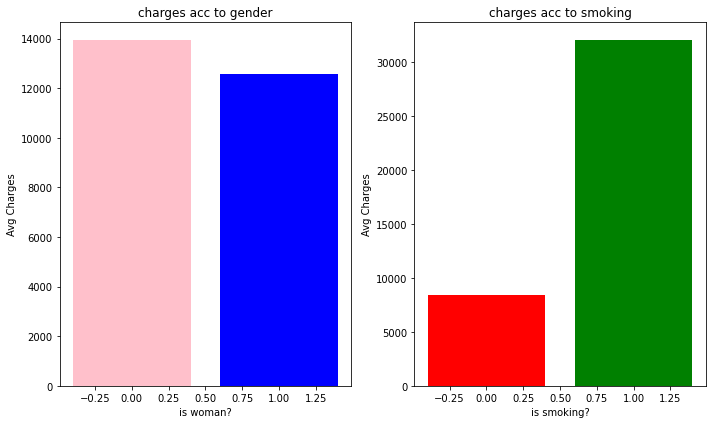

In [7]:
plt.figure(figsize =(10,6))

plt.subplot(1,2,1)
plt.bar(insurance.groupby('is_woman')['charges'].mean().index, insurance.groupby('is_woman')['charges'].mean(),  color=("pink","blue"))
plt.title('charges acc to gender')
plt.xlabel('is woman?')
plt.ylabel('Avg Charges')



plt.subplot(1,2,2)
plt.bar(insurance.groupby('is_smoker')['charges'].mean().index, insurance.groupby('is_smoker')['charges'].mean(), color=("red","green"))
plt.title('charges acc to smoking')
plt.xlabel('is smoking?')
plt.ylabel('Avg Charges')

plt.tight_layout()
plt.show()



In [8]:
y = insurance['charges']
x = insurance[['is_woman','is_smoker']]


In [9]:
lrm = linear_model.LinearRegression()
lrm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print('degiskenler: \n', lrm.coef_)
print('degiskenler: \n', lrm.intercept_)

degiskenler: 
 [   65.37843464 23622.1345855 ]
degiskenler: 
 8400.657392079152


In [11]:
import statsmodels.api as sm

x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1088.
Date:                Wed, 20 May 2020   Prob (F-statistic):          4.78e-281
Time:                        15:56:05   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1335   BIC:                         2.768e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8400.6574    311.244     26.991      0.000    7790.077    9011.237
is_woman      65.3784    409.809      0.160      0.873    -738.561     869.318
is_smoker   2.362e+04    507.736     46.524      0.000    2.26e+04    2.46e+04
==============================================================================
Omnibus:                      135.842   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.897
Skew:                           0.727   Prob(JB):                     9.71e-47
Kurtosis:                       4.299   Cond. No.                         3.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ASSIGMENTS

In [12]:
houses = pd.read_csv('houseprice.csv')
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
houses.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
houses = houses.drop([ 'PoolQC','MiscFeature', 'Alley','Fence','FireplaceQu', 'PoolQC', 'MiscFeature'], axis = 1)
houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


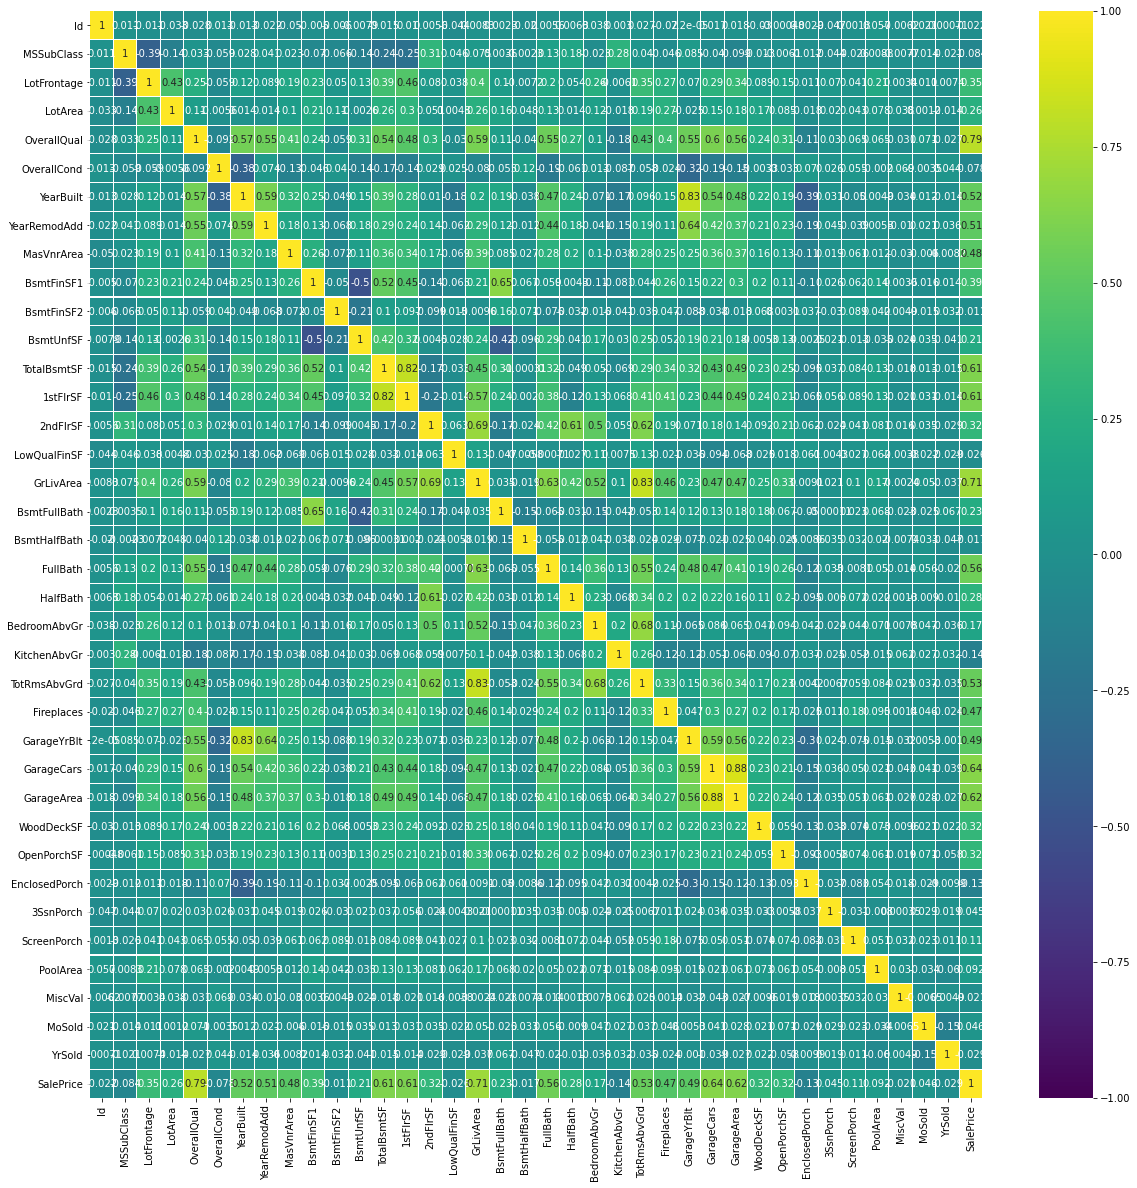

In [16]:
housecorrelation = houses.corr()
plt.figure(figsize=(20,20))
sns.heatmap(housecorrelation, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [26]:
#scikit-learn

Y = houses['SalePrice']
X = houses[["OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLivArea", 'GarageCars', 'GarageArea']]
            
regr=linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([207136.37236292, 176885.98615846, 213630.45536465, ...,
       226085.46352513, 120446.96757128, 135019.39220874])

In [18]:
print('degiskenler: \n', regr.coef_)
print('degiskenler: \n', regr.intercept_)

degiskenler: 
 [2.39970394e+04 2.43907676e+01 1.11859135e+01 4.31228864e+01
 1.45151932e+04 1.56639341e+01]
degiskenler: 
 -102650.90069028983


In [19]:
#statmodels 
X=sm.add_constant(X)
sonuc=sm.OLS(Y, X).fit()
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     775.0
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        15:56:11   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1453   BIC:                         3.504e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.027e+05   4903.994    -20.932      0.000   -1.12e+05    -9.3e+04
OverallQual    2.4e+04   1083.393     22.150      0.000    2.19e+04    2.61e+04
TotalBsmtSF    24.3908      4.318      5.649      0.000      15.921      32.860
1stFlrSF       11.1859      5.032      2.223      0.026       1.315      21.057
GrLivArea      43.1229      2.679     16.095      0.000      37.867      48.379
GarageCars   1.452e+04   3018.621      4.809      0.000    8593.872    2.04e+04
GarageArea     15.6639     10.475      1.495      0.135      -4.884      36.212
==============================================================================
Omnibus:                      431.781   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39208.253
Skew:                          -0.313   Prob(JB):                         0.00
Kurtosis:                      28.380   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
print("SalePrice= {:.3f} +\n {:.3f} OverallQual +\n {:.3f} TotalBsmtSF +\n {:.3f} 1stFlrSF +\n {:.3f} GrLivArea +\n {:.3f} GarageCars +\n {:.3f}  GarageArea +\n"
      .format(regr.intercept_, regr.coef_[0], regr.coef_[1], regr.coef_[2], regr.coef_[3], regr.coef_[4], regr.coef_[5]))

SalePrice= -102650.901 +
 23997.039 OverallQual +
 24.391 TotalBsmtSF +
 11.186 1stFlrSF +
 43.123 GrLivArea +
 14515.193 GarageCars +
 15.664  GarageArea +



## CHECK GAUSS MARKOV ASSUMPTIONS

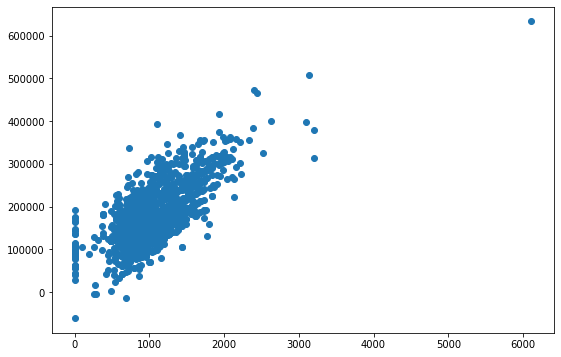

In [35]:

# Assumption 1 :The regression model is linear in the coefficients and the error term


newhouses = houses[['SalePrice', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']]
prediction = regr.predict(X)

plt.figure(figsize=(9,6))
plt.scatter(houses["TotalBsmtSF"], prediction)
plt.show()

In [30]:
# Assumption 2:The error term has a population mean of zero

errors = Y - prediction

print("mean error : {:.18f}".format(np.mean(errors)))

mean error : -0.000000000010684694


In [33]:
# Assumption 3 :Homoscedasticity

bart_stats2 = bartlett(prediction, errors)
lev_stats2 = levene(prediction, errors)

print("Bartlett: {} p value : {:.10f}".format(int(bart_stats2[0]), int(bart_stats2[1])))
print("Levene: {} p value : {:.10f}".format(int(lev_stats2[0]), int(lev_stats2[1])))

Bartlett: 467 p value : 0.0000000000
Levene: 448 p value : 0.0000000000


In [36]:
# Assumption 4:Low multicollinearity

corr_mat = newhouses.corr()
corr_mat

,SalePrice,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
SalePrice,1.000000,0.790982,0.613581,0.605852,0.708624,0.640409,0.623431
OverallQual,0.790982,1.000000,0.537808,0.476224,0.593007,0.600671,0.562022
TotalBsmtSF,0.613581,0.537808,1.000000,0.819530,0.454868,0.434585,0.486665
1stFlrSF,0.605852,0.476224,0.819530,1.000000,0.566024,0.439317,0.489782
GrLivArea,0.708624,0.593007,0.454868,0.566024,1.000000,0.467247,0.468997
GarageCars,0.640409,0.600671,0.434585,0.439317,0.467247,1.000000,0.882475
GarageArea,0.623431,0.562022,0.486665,0.489782,0.468997,0.882475,1.000000


In [ ]:
# totalBsmtSF ile 1stFlrSF high correlation!!! 


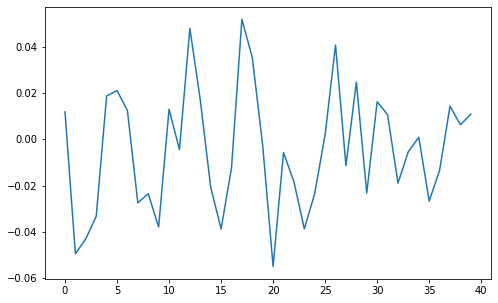

In [43]:
# assumption 5::Observations of the error term are uncorrelated with each other

acf_dt=acf(errors)

plt.figure(figsize=(8,5))
plt.plot(acf_dt[1:])
plt.show()

In [40]:
# errors haven't any relation


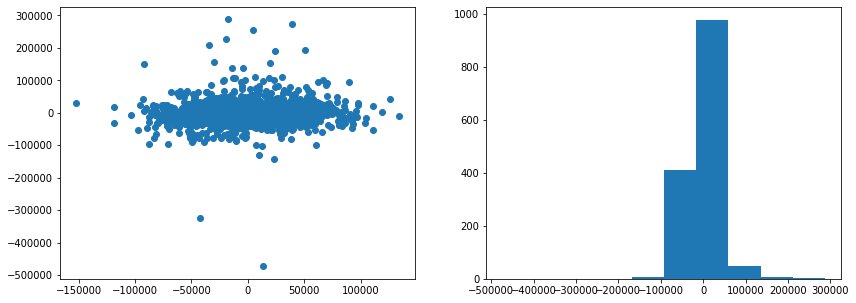

In [39]:
# Assumption 6 ::All independent variables are uncorrelated with the error term - exogeneity
normal_random=np.random.normal(errors.mean(), errors.std(), len(errors))

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(normal_random, errors)

plt.subplot(1,2,2)
plt.hist(errors)

plt.show()

In [42]:
jb_stats2 = jarque_bera(errors)
norm_stats2 = normaltest(errors)

print("Jarque-Bera test: {} and p value : {:.5f}".format(jb_stats2[0], jb_stats2[1]))
print("Normal test: {}  and p value : {:.5f}".format(int(norm_stats2[0]), int(norm_stats2[1])))

Jarque-Bera test: 39208.25293625244 and p value : 0.00000
Normal test: 431  and p value : 0.00000
